In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

import adnet.library as lib
%matplotlib notebook

# Supplemenatry figure 13 heatmaps
Author: Vito Zanotelli

This is the code for the supplementary figure 13.

In [15]:
fn_bindat = "/mnt/imls-bod/XiaokangL/EGF transfection/plots/nbin10_2.5perc_bpr2_median_25_final_test2/bindat"
fn_completedat = "/mnt/imls-bod/XiaokangL/EGF transfection/plots/nbin10_2.5perc_bpr2_median_25_final_test2/complete_dat"
plot_folder = '../example/testoutput/main'
vr_tresh = 0.11

In [16]:
complete_data = pd.read_pickle(fn_completedat)
bin_dat = pd.read_pickle(fn_bindat)

## Generate the bp-R2 heatmap

In [24]:
plot_mat = bin_dat['stats']['mean_var_ratio'].copy()

lvl =  ['marker','experiment', 'timepoint','target']
plot_mat = plot_mat.reset_index(lvl, drop=False)
plot_mat['max'] = plot_mat.groupby(['marker'])['mean_var_ratio'].transform(lambda x: 1-np.sum(x >vr_tresh))
plot_mat = plot_mat.sort_values(by=['max']+lvl, ascending=False)
plot_mat =plot_mat.set_index(['max']+lvl, append=False)

plot_mat.loc[plot_mat['mean_var_ratio'] <0,'mean_var_ratio'] = 0

plot_mat = plot_mat.unstack('target')
plot_mat = plot_mat.reset_index('max')

order_index = plot_mat.index


plot_mat = plot_mat['mean_var_ratio']
col = [c for c in complete_data.columns if c != 'GFP']
plot_mat  =  plot_mat[col]

<IPython.core.display.Javascript object>


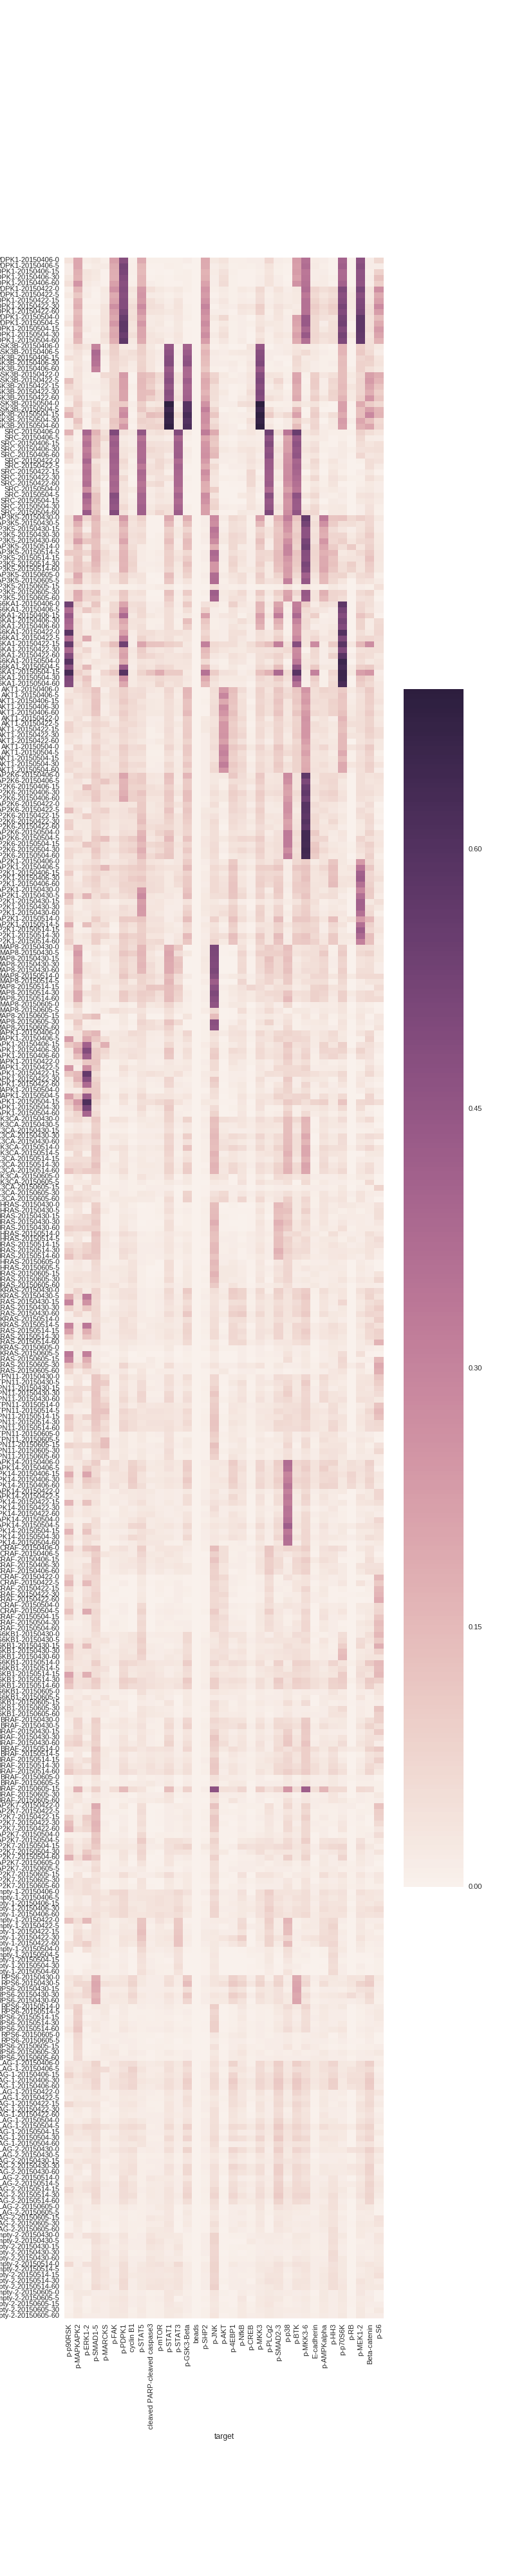

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5]),
 <a list of 35 Text xticklabel objects>)

In [25]:
p = plt.figure(figsize=(10,50))
sns.heatmap(plot_mat,square=False, annot=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90) 

-> This is the basis of the Supplementary Figure 13b

## Generate the median level heatmap

In [27]:
plot_mat = complete_data.groupby(level=['marker','experiment', 'timepoint']).median()

plot_mat = lib.transform_arcsinh(plot_mat, reverse=True)
plot_mat = plot_mat.applymap(lambda x: np.max([abs(x),0.0001]))
fil = plot_mat.index.get_level_values('marker').isin(['GFP-FLAG-1','GFP-FLAG-2'])
ref = plot_mat.loc[fil].xs(0, level='timepoint').mean(axis=0)


plot_mat = plot_mat.apply(lambda x: x/ref, axis=1)

plot_mat = plot_mat.reorder_levels(['marker','experiment', 'timepoint'])
plot_mat = plot_mat.loc[order_index]

plot_mat = plot_mat.apply(np.log2)

<IPython.core.display.Javascript object>


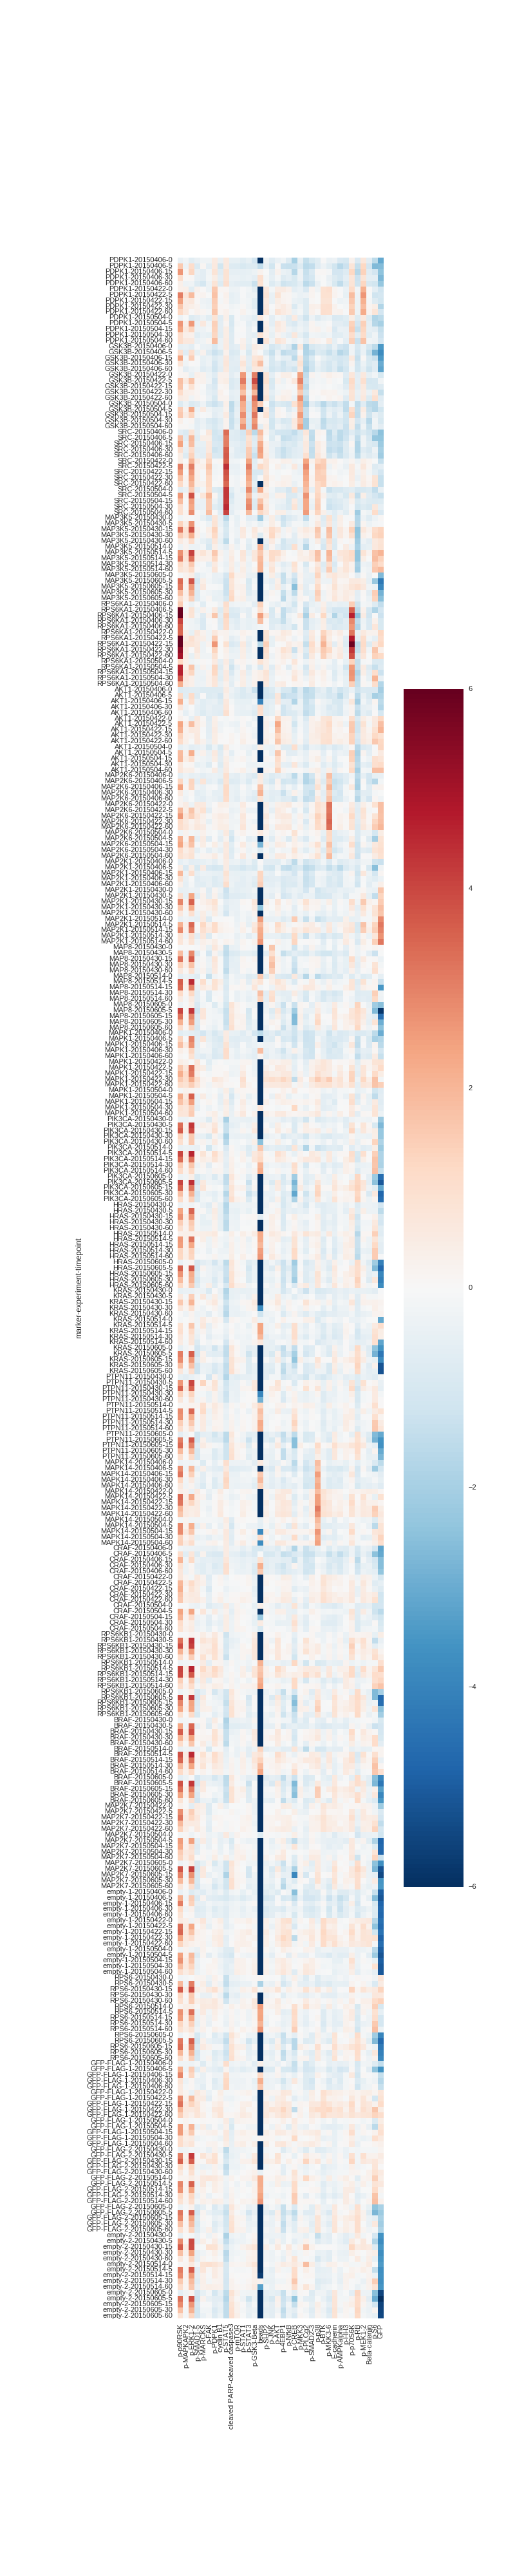

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5]),
 <a list of 36 Text xticklabel objects>)

In [28]:
p = plt.figure(figsize=(10,50))
sns.heatmap(plot_mat, square=True, vmin=-6, vmax=6)
plt.yticks(rotation=0)
plt.xticks(rotation=90) 

-> This is the basis of the Supplementary Figure 13a